Loki Aguilera-Keifert

## Introduction



Our target audience of this analysis of **"Iowa Quarterly Retail Sales Tax Data by 12 Business Groups"** will be valuable to various retails as a means of gauging, to some degree, consumer tax sensitivities on a county level in Iowa and with respect to business groups. This analysis could prove insightful for both state/county/municipal bodies gauging the impact of their consumption taxes and to draw relationships between number of returns & taxable sales to other population or census-related data on a county level as well, as a means of gauging relationships (depending on other parameters as well) between, for example, household income and taxable sales. Retailers or Businesses could also use this data for the same purposes, as well as incorporating analysis of consumption taxes as part of a larger aggregate demand effects (increase in consumption taxes affecting consumer disposable income, affecting consumer spending, etc.).  

More specifically, this will be for relevant government officials whose districts overlap with **Jasper County** as we will be exploring Jasper County's business (I arbitrarily choose Jasper because its id=50).

## Environment Setup

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Read Iowa Quarterly Retail Sales Tax Data

In [5]:
# Prepping the dataset

iowa_sales_tax_data = pd.read_csv('./Iowa_Quarterly_Retail_Sales_Tax_Data_by_12_Business_Groups_20250128.csv')

In [62]:
# Ensuring data is available

iowa_sales_tax_data.head(15)

,Fiscal Year,Quarter Ending,County_Number,County,Business Group,Number of Returns,Taxable Sales,Computed Tax,Percent of Tax
0,2023,September 2022,1,Adair,Apparel,S,S,S,S
1,2023,September 2022,1,Adair,Building Materials,6,"$452,651","$27,159",0.00%
2,2023,September 2022,16,Cedar,Food Dealers,56,"$6,182,432","$370,946",0.05%
3,2023,December 2022,8,Boone,Wholesale,49,"$5,672,869","$340,372",0.05%
4,2023,June 2023,86,Tama,Food Dealers,54,"$5,370,497","$322,230",0.04%
5,2023,June 2023,86,Tama,General Merchandise,11,"$680,777","$40,847",0.01%
6,2023,June 2023,86,Tama,Home Furnishings,15,"$899,786","$53,987",0.01%
7,2023,June 2023,86,Tama,Miscellaneous,175,"$4,178,684","$250,721",0.03%
8,2023,June 2023,86,Tama,Motor Vehicle,39,"$3,532,088","$211,925",0.03%
9,2023,June 2023,86,Tama,Service,255,"$2,603,431","$154,404",0.02%


In [9]:
# Sampling random data from tax data as an additional sanity check and to review any potential outliers on first pass

iowa_sales_tax_data.sample(15)


,Fiscal Year,Quarter Ending,County_Number,County,Business Group,Number of Returns,Taxable Sales,Computed Tax,Percent of Tax
20485,2002,June 2002,86,Tama,Home Furnishings,15,"$408,788","$20,439",0.01%
14809,2001,June 2001,46,Humboldt,County Totals,414,"$17,985,615","$899,281",0.25%
55740,2009,June 2009,24,Crawford,Miscellaneous,74,"$2,051,134","$123,068",0.03%
21642,2003,September 2002,76,Pocahontas,General Merchandise,S,S,S,S
116351,2021,March 2021,38,Grundy,General Merchandise,5,"$319,195","$19,152",0.00%
78853,2014,December 2013,15,Cass,Wholesale,50,"$5,445,021","$326,701",0.06%
74678,2013,December 2012,90,Wapello,Wholesale,50,"$6,097,761","$365,866",0.07%
58376,2010,December 2009,26,Davis,Specialty Retail,87,"$533,026","$31,982",0.01%
90456,2016,March 2016,11,Buena Vista,Motor Vehicle,16,"$3,570,035","$214,202",0.04%
62268,2011,September 2010,29,Des Moines,Eating and Drinking,101,"$13,619,187","$817,151",0.16%


## **Preliminary Analysis**

Analysis:

* As hinted by Professor Kattan, we can observe some rows under columns **"Number of Returns", "Taxable Sales", "Computed Tax", and "Percent of Tax" each containing 'S' values.** Of course, this is only a random sample of 15 rows from a dataset containing exactly 126146 rows, but so far we are seeing that the 'S' values will appear concurrently across all 4 mentioned columns which will be helpful for data cleaning purposes.
* Another interesting note is the presence of '$', ',' , and '%' characters in the **"Taxable Sales", "Computed Tax", and "Percent of Tax"** columns.


Actions for Data Cleaning:
* I will also ensure to set up appropriate safeguards to detect any anomalies among these outlier rows (e.g. cases where only 3/4, 2/4, and 1/4 columns contain S). I don't suspect this will be the case because I believe it's the low amount of observations of **"Number of Returns"** that reflects 'S' values across all 4 columns.
* I will convert the 'S' values to NaN/Null values to clean the data for more rigorous analysis. 
* I will convert the **"Taxable Sales" and ""Computed Tax"** columns to numeric values, including removing the '$' and ',' signs.
* I will remove the '%' value from the **"Percent of Tax"** column 

For next steps, we will broadly review the following:

* The columns within the dataset
* The datatypes across all columns of the dataset


### Reviewing the columns

In [10]:
iowa_sales_tax_data.columns

Index(['Fiscal Year', 'Quarter Ending', 'County_Number', 'County',
       'Business Group', 'Number of Returns', 'Taxable Sales', 'Computed Tax',
       'Percent of Tax'],
      dtype='object')

### Reviewing the datatypes across all columns

In [11]:
iowa_sales_tax_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126146 entries, 0 to 126145
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Fiscal Year        126146 non-null  int64 
 1   Quarter Ending     126146 non-null  object
 2   County_Number      126146 non-null  int64 
 3   County             126146 non-null  object
 4   Business Group     126145 non-null  object
 5   Number of Returns  126146 non-null  object
 6   Taxable Sales      126146 non-null  object
 7   Computed Tax       126146 non-null  object
 8   Percent of Tax     126146 non-null  object
dtypes: int64(2), object(7)
memory usage: 8.7+ MB


## **Preliminary Analysis (Continued)**

I also considered looking into the following:

* The summary statistics of the **"Number of Returns", "Taxable Sales", "Computed Tax", and "Percent of Tax"** columns

But realized that given the S values, it may be difficult to assess the summary stats. In the meantime, we can observe from our reviews of the columns and datatypes that all columns and rows within the dataset are accounted for within the dataset (126146 entries accounted for) and Fiscal Year through Percent of Tax are included.

There are 2 more notes that we can take here:

* The datatype 'object' accounts for 6/8 of the columns available within the dataset. As we have learned from class and relevant documentation, the 'object' data type is a catch-all to hold a mix of data types, including numbers and strings. We have already identified columns 5 through 8 that contain 'S' strings in lieu of earlier analysis. Interestingly enough, column 4 or "Business Group" contains objects but our previous sample revealed strings and given the name of the column, I believe it's appropriate to assume that Business Group should exclusively contain string datatypes. The same circumstances apply to "County".

* "Quarter Ending" gets a little more interesting given that our sample revealed a mix of string and numeric values, but in any case, these values should default to strings--this may imply that there may be exclusively string or numeric datatypes across >= 1 row in the dataset. 

## **Data Cleaning (Steps)**

In summary, here are the steps we want to take to properly clean the data in preparation for more in-depth EDA:

#### Data Outliers Exploration

* I will ensure to set up appropriate safeguards to detect any anomalies among these outlier rows (e.g. cases where only 3/4, 2/4, and 1/4 columns contain S). I don't suspect this will be the case because I believe it's the low amount of observations of **"Number of Returns"** that reflects 'S' values across all 4 columns.


#### Data Type Exploration

* I will identify the distinct data types across all columns within the dataset and respectively sample a value for visual inspection 

#### Data Transformation (pending completed Data Type Exploration)

* I will convert the 'S' values to NaN/Null values to clean the data for more rigorous analysis. 
* I will convert the **"Taxable Sales" and ""Computed Tax"** columns to numeric values, including removing the '$' and ',' signs.
* I will remove the '%' value from the **"Percent of Tax"** column
* I will transform the values under **"Quarter Ending"** to a 'YYYY/MM/DD' format based on financial quarter end dates


### Data Outliers Exploration

In [49]:
# Create a copy of the original DataFrame to preserve it
iowa_sales_tax_data_anomalies_review = iowa_sales_tax_data.copy()

In [50]:
# Count the number of 'S' values in each row for the specified columns
s_counts = iowa_sales_tax_data_anomalies_review[columns_to_check].isin(['S']).sum(axis=1)

# Identify cases where exactly 3, 2, or 1 columns contain 'S'
cases_3_of_4 = s_counts[s_counts == 3]
cases_2_of_4 = s_counts[s_counts == 2]
cases_1_of_4 = s_counts[s_counts == 1]

# Count the occurrences for each case
count_3_of_4 = len(cases_3_of_4)
count_2_of_4 = len(cases_2_of_4)
count_1_of_4 = len(cases_1_of_4)

# Display the counts
{
    "3/4 Columns Contain 'S'": count_3_of_4,
    "2/4 Columns Contain 'S'": count_2_of_4,
    "1/4 Columns Contain 'S'": count_1_of_4
}


{"3/4 Columns Contain 'S'": 10,
 "2/4 Columns Contain 'S'": 0,
 "1/4 Columns Contain 'S'": 33}

We can observe that there are some rows across the 4 columns where there are only 3 'S' values and in other cases, where only 1 'S' value occurs as well. We'll explore these cases below.

## Cases where 'S' appears ONLY **once** across 4 columns

In [54]:
# Count the number of 'S' values in each row for the specified columns
s_counts = iowa_sales_tax_data_anomalies_review[columns_to_check].isin(['S']).sum(axis=1)

# Identify cases where exactly 3 or 1 columns contain 'S'
cases_1_of_4 = iowa_sales_tax_data_anomalies_review[s_counts == 1]

# Sample 10 rows from each group (or fewer if there aren't enough rows)
sample_1_of_4 = cases_1_of_4.sample(n=min(15, len(cases_1_of_4)), random_state=42)

# Output the samples as DataFrames
sample_1_of_4  # Reveal the rows where 1/4 columns contain 'S'


,Fiscal Year,Quarter Ending,County_Number,County,Business Group,Number of Returns,Taxable Sales,Computed Tax,Percent of Tax
25794,2003,June 2003,98,Worth,General Merchandise,S,"$328,582","$16,429",0.00%
25033,2003,June 2003,40,Hamilton,Apparel,S,"$77,665","$3,883",0.00%
25454,2003,June 2003,72,Osceola,General Merchandise,S,"$500,382","$25,019",0.01%
25046,2003,June 2003,41,Hancock,Apparel,S,"$566,717","$28,336",0.01%
24861,2003,June 2003,26,Davis,Utilities and Transportation,S,"$1,972,909","$98,645",0.03%
24942,2003,June 2003,33,Fayette,Apparel,S,"$325,087","$16,254",0.00%
25078,2003,June 2003,43,Harrison,Home Furnishings,S,"$620,065","$31,003",0.01%
25272,2003,June 2003,58,Louisa,General Merchandise,S,"$447,719","$22,386",0.01%
25000,2003,June 2003,37,Greene,Home Furnishings,S,"$153,656","$7,683",0.00%
24530,2003,June 2003,1,Adair,General Merchandise,S,"$472,304","$23,615",0.01%


## Cases where 'S' appears ONLY **three times** across 4 columns

In [52]:
# Count the number of 'S' values in each row for the specified columns
s_counts = iowa_sales_tax_data_anomalies_review[columns_to_check].isin(['S']).sum(axis=1)

# Identify cases where exactly 3 or 1 columns contain 'S'
cases_3_of_4 = iowa_sales_tax_data_anomalies_review[s_counts == 3]

# Sample 10 rows from each group (or fewer if there aren't enough rows)
sample_3_of_4 = cases_3_of_4.sample(n=min(10, len(cases_3_of_4)), random_state=42)

# Output the samples as DataFrames
sample_3_of_4  # Reveal the rows where 3/4 columns contain 'S'


,Fiscal Year,Quarter Ending,County_Number,County,Business Group,Number of Returns,Taxable Sales,Computed Tax,Percent of Tax
25808,2003,June 2003,99,Wright,Home Furnishings,8,S,S,S
25129,2003,June 2003,47,Ida,General Merchandise,5,S,S,S
25646,2003,June 2003,87,Taylor,Building Materials,5,S,S,S
25073,2003,June 2003,43,Harrison,Building Materials,6,S,S,S
25797,2003,June 2003,98,Worth,Motor Vehicle,7,S,S,S
25285,2003,June 2003,59,Lucas,General Merchandise,6,S,S,S
106345,2019,March 2019,58,Louisa,Building Materials,S,S,S,0.00%
25457,2003,June 2003,72,Osceola,Motor Vehicle,5,S,S,S
25403,2003,June 2003,68,Monroe,Home Furnishings,6,S,S,S
25728,2003,June 2003,93,Wayne,General Merchandise,5,S,S,S


## **Review of Data Outliers Exploration**

* It appears that June 2003 (with one March 2019 making an appearance in the 3/4 case) is a special year. Further data exploration, possibly joining other datasets or researching for additional context, may help to explain why June 2003 appears to be an anomalous quarter ending value. There is no direct relationship between the counties to indicate anything (as each row is distinct based on county), but we can see that there are a low number of returns for the 3/4 case--possibly, these values were overlooked in substituting their numeric values for 'S' values. This may also be reinforced by the 0.00% value under Percent of Tax (March 2019) whereas the other values within the row are S values--another missed substitution.
* Even more interesting is that there are significant values for taxable sales for the 1/4 case and yet the Number of Returns are treated as insignificant--again, occurring within the June 2003 quarter ending. This could also indicate some type of reporting error, somewhere along the data pipeline between the commercial enterprise and the county database--maybe the data isn't being properly ingested? Perhaps some constraints were applied during ingestion that should be relaxed?

**Next Steps**:

I am going to remove these rows from analysis, as I believe the data should be considered garbage given the errors--since the Number of Returns is insignificant, I don't believe removing the rows will have a statistically significant impact on downstream analysis.

In [56]:
# Count the number of 'S' values in each row for the specified columns
s_counts = iowa_sales_tax_data_clean_v1[columns_to_check].isin(['S']).sum(axis=1)

# Identify the indices of rows where exactly 3 or 1 columns contain 'S'
indices_to_remove = s_counts[(s_counts == 3) | (s_counts == 1)].index

# New dataframe excluding rows with partial s values
iowa_sales_tax_data_no_partial_s = iowa_sales_tax_data_clean_v1.drop(index=indices_to_remove)

# Display the new DataFrame (this will reveal in Jupyter, not print)
iowa_sales_tax_data_no_partial_s


,Fiscal Year,Quarter Ending,County_Number,County,Business Group,Number of Returns,Taxable Sales,Computed Tax,Percent of Tax
0,2023,September 2022,1,Adair,Apparel,S,S,S,S
1,2023,September 2022,1,Adair,Building Materials,6,"$452,651","$27,159",0.00%
2,2023,September 2022,16,Cedar,Food Dealers,56,"$6,182,432","$370,946",0.05%
3,2023,December 2022,8,Boone,Wholesale,49,"$5,672,869","$340,372",0.05%
4,2023,June 2023,86,Tama,Food Dealers,54,"$5,370,497","$322,230",0.04%
...,...,...,...,...,...,...,...,...,...
126141,2024,June 2024,99,Wright,Specialty Retail,85,"$1,262,733","$75,764",0.01%
126142,2024,June 2024,99,Wright,Utilities and Transportation,87,"$4,837,755","$290,265",0.04%
126143,2024,June 2024,99,Wright,Wholesale,54,"$2,526,135","$151,568",0.02%
126144,2024,June 2024,99,Wright,County Totals,892,"$28,967,427","$1,735,254",0.23%


### Data Type Exploration

In [57]:
# Function to identify all distinct data types within each column
def get_distinct_data_types(df):
    column_data_types = {}
    for col in df.columns:
        # Apply a set comprehension to capture the type of each value in the column
        distinct_types = {type(value) for value in df[col].dropna()}  # Exclude NaN values
        column_data_types[col] = distinct_types
    return column_data_types

# Get all distinct data types for each column
distinct_data_types = get_distinct_data_types(iowa_sales_tax_data_no_partial_s)

# Create a DataFrame summarizing distinct data types for each column
data_type_summary = pd.DataFrame({
    'Column Name': distinct_data_types.keys(),
    'Distinct Data Types': distinct_data_types.values()
})

# Display the summary DataFrame
data_type_summary


,Column Name,Distinct Data Types
0,Fiscal Year,{<class 'int'>}
1,Quarter Ending,{<class 'str'>}
2,County_Number,{<class 'int'>}
3,County,{<class 'str'>}
4,Business Group,{<class 'str'>}
5,Number of Returns,{<class 'str'>}
6,Taxable Sales,{<class 'str'>}
7,Computed Tax,{<class 'str'>}
8,Percent of Tax,{<class 'str'>}


### Data Transformation

In [58]:
# 1. Convert 'S' values to NaN in the specified columns
iowa_sales_tax_data_no_partial_s[columns_to_check] = iowa_sales_tax_data_no_partial_s[columns_to_check].replace('S', np.nan)

# 2. Clean and convert "Taxable Sales" and "Computed Tax" to numeric

# Define a function to clean monetary columns using raw strings to avoid escape sequence issues
def clean_monetary_column(column):
    return column.replace(r'[$,]', '', regex=True).astype(float)

# Apply the function to "Taxable Sales" and "Computed Tax"
iowa_sales_tax_data_no_partial_s['Taxable Sales'] = clean_monetary_column(iowa_sales_tax_data_no_partial_s['Taxable Sales'])
iowa_sales_tax_data_no_partial_s['Computed Tax'] = clean_monetary_column(iowa_sales_tax_data_no_partial_s['Computed Tax'])

# 3. Clean and convert "Percent of Tax" to numeric

# Convert the column to string, replace '%' and 'nan', then convert to float
iowa_sales_tax_data_no_partial_s['Percent of Tax'] = (
    iowa_sales_tax_data_no_partial_s['Percent of Tax']
    .astype(str)                     # Ensure all entries are strings
    .str.replace('%', '', regex=False)  # Remove the '%' symbol
    .replace('nan', np.nan)         # Convert 'nan' strings back to NaN
    .astype(float)                   # Convert the column to float
)

# 4. Handle "Number of Returns" column

# Assuming "Number of Returns" should be numeric, remove commas and convert to float
iowa_sales_tax_data_no_partial_s['Number of Returns'] = (
    iowa_sales_tax_data_no_partial_s['Number of Returns']
    .str.replace(',', '', regex=False)
    .astype(float)
)

# 5. Handle "Quarter Ending" column

# Define a function to parse "Quarter Ending" strings to datetime
def parse_quarter_ending(quarter_str):
    try:
        return pd.to_datetime(quarter_str)
    except:
        return pd.NaT

# Apply the function to "Quarter Ending"
iowa_sales_tax_data_no_partial_s['Quarter Ending'] = iowa_sales_tax_data_no_partial_s['Quarter Ending'].apply(parse_quarter_ending)


In [59]:
iowa_sales_tax_data_no_partial_s.sample(15)

,Fiscal Year,Quarter Ending,County_Number,County,Business Group,Number of Returns,Taxable Sales,Computed Tax,Percent of Tax
107968,2019,2019-06-01,84,Sioux,County Totals,1196.0,109832538.0,6573803.0,1.04
6620,2024,2023-12-01,9,Bremer,Specialty Retail,218.0,5149505.0,308970.0,0.04
20446,2002,2002-06-01,83,Shelby,Home Furnishings,16.0,425512.0,21276.0,0.01
85323,2015,2015-03-01,12,Butler,Motor Vehicle,6.0,725594.0,43536.0,0.01
35356,2005,2005-06-01,42,Hardin,Specialty Retail,109.0,1266634.0,63332.0,0.02
86210,2015,2015-03-01,80,Ringgold,Utilities and Transportation,8.0,3635652.0,218139.0,0.04
87176,2015,2015-06-01,56,Lee,Eating and Drinking,98.0,9971332.0,598280.0,0.10
48331,2008,2007-12-01,48,Iowa,County Totals,794.0,47818858.0,2390943.0,0.55
6132,2024,2023-09-01,71,O'Brien,Miscellaneous,197.0,4718336.0,283094.0,0.04
20428,2002,2002-06-01,82,Scott,Building Materials,64.0,34101601.0,1705080.0,0.47


In [60]:
# Function to identify all distinct data types within each column
def get_distinct_data_types(df):
    column_data_types = {}
    for col in df.columns:
        # Apply a set comprehension to capture the type of each value in the column
        distinct_types = {type(value) for value in df[col].dropna()}  # Exclude NaN values
        column_data_types[col] = distinct_types
    return column_data_types

# Get all distinct data types for each column
distinct_data_types = get_distinct_data_types(iowa_sales_tax_data_no_partial_s)

# Create a DataFrame summarizing distinct data types for each column
data_type_summary = pd.DataFrame({
    'Column Name': distinct_data_types.keys(),
    'Distinct Data Types': distinct_data_types.values()
})

# Display the summary DataFrame
data_type_summary


,Column Name,Distinct Data Types
0,Fiscal Year,{<class 'int'>}
1,Quarter Ending,{<class 'pandas._libs.tslibs.timestamps.Timest...
2,County_Number,{<class 'int'>}
3,County,{<class 'str'>}
4,Business Group,{<class 'str'>}
5,Number of Returns,{<class 'float'>}
6,Taxable Sales,{<class 'float'>}
7,Computed Tax,{<class 'float'>}
8,Percent of Tax,{<class 'float'>}


In [61]:
iowa_sales_tax_data_no_partial_s.describe()

,Fiscal Year,Quarter Ending,County_Number,Number of Returns,Taxable Sales,Computed Tax,Percent of Tax
count,126103.000000,126103,126103.000000,113666.000000,1.136660e+05,1.136660e+05,113666.000000
mean,2012.249471,2012-04-17 16:27:44.467934976,50.007343,183.599018,1.741441e+07,9.972700e+05,0.188961
min,2000.000000,2000-03-01 00:00:00,1.000000,5.000000,7.010000e+02,4.200000e+01,0.000000
25%,2006.000000,2006-03-01 00:00:00,25.000000,16.000000,1.191266e+06,6.648150e+04,0.010000
50%,2012.000000,2012-06-01 00:00:00,50.000000,37.000000,2.782784e+06,1.561625e+05,0.030000
75%,2018.000000,2018-06-01 00:00:00,75.000000,114.000000,8.126830e+06,4.592455e+05,0.090000
max,2024.000000,2024-06-01 00:00:00,100.000000,202324.000000,1.318421e+10,7.889983e+08,100.000000
std,7.075208,NaN,28.582547,1822.904007,1.691713e+08,1.004772e+07,1.553532


In [64]:
def get_distinct_quarter_endings_by_year_range(df, start_year, end_year):
    """
    Returns a DataFrame of distinct quarter endings for each year in the given range.

    Parameters:
    - df (pd.DataFrame): The DataFrame containing the data.
    - start_year (int): The starting year of the range.
    - end_year (int): The ending year of the range.

    Returns:
    - pd.DataFrame: A DataFrame with years and their distinct quarter endings.
    """
    results = []

    for year in range(start_year, end_year + 1):
        # Filter rows for the current year
        filtered_df = df[df['Quarter Ending'].dt.year == year]

        # Extract unique quarter endings and format as 'YYYY-MM'
        unique_quarters = filtered_df['Quarter Ending'].dropna().unique()
        formatted_quarters = sorted([date.strftime('%Y-%m') for date in unique_quarters])

        # Append the results
        results.append({
            'Year': year,
            'Distinct Quarter Endings': formatted_quarters
        })

    # Convert the results to a DataFrame
    results_df = pd.DataFrame(results)

    return results_df

# Example Usage:
distinct_quarters_by_year = get_distinct_quarter_endings_by_year_range(
    iowa_sales_tax_data_no_partial_s,
    start_year=2000,
    end_year=2024
)

# Display the DataFrame
distinct_quarters_by_year


,Year,Distinct Quarter Endings
0,2000,"[2000-03, 2000-06, 2000-09, 2000-12]"
1,2001,"[2001-03, 2001-06, 2001-09, 2001-12]"
2,2002,"[2002-03, 2002-06, 2002-09, 2002-12]"
3,2003,"[2003-03, 2003-06, 2003-09, 2003-12]"
4,2004,"[2004-03, 2004-06, 2004-09, 2004-12]"
5,2005,"[2005-03, 2005-06, 2005-09, 2005-12]"
6,2006,"[2006-03, 2006-06, 2006-09, 2006-12]"
7,2007,"[2007-03, 2007-06, 2007-09, 2007-12]"
8,2008,"[2008-03, 2008-06, 2008-09, 2008-12]"
9,2009,"[2009-03, 2009-06, 2009-09, 2009-12]"


## **Review of Data Type and Data Transformation**

Analysis:

* 202324.000000 as a max for "Number of Returns" is an exceptionally high value. Same goes 1.318421e+10 in "Taxable Sales" and 7.889983e+08 in "Computed Tax". These outliers likely will significantly skew our analysis, evidenced by our standard deviations.
* Now that we have datetime and we know that the Quarter Ending operates based on fiscal year, it's time to update the quarter ending dates to the actual dates - we discover in the cell above that between the years 2000 and 2024, there is a pattern in fiscal quarter ending months which follows the quarterly basis of the typical fiscal year (Gregorian calendar). In this case, the fiscal quarters end on 03-31, 06-30, 09-40, and 12-31, which is consistent with the months listed in the dataframe. We can safely update these dates with the correct datetimes for proper analysis going forward.

Next Steps:

* Drop NaN rows - this amounts to about 12,437 entries being dropped out of 126146 rows. 
* Update Quarter Endings dates to: 03-31, 06-30, 09-30, and 12-31 but maintain the years



In [65]:
# Define the columns to check for NaN
columns_to_dropna = ['Number of Returns', 'Taxable Sales', 'Computed Tax', 'Percent of Tax']

# 1. Drop rows with NaN in specified columns
iowa_cleaned_data = iowa_sales_tax_data_no_partial_s.dropna(subset=columns_to_dropna).copy()

# Verify the number of rows dropped
initial_count = len(iowa_sales_tax_data_no_partial_s)
final_count = len(iowa_cleaned_data)
rows_dropped = initial_count - final_count
print(f"Rows dropped due to NaN values: {rows_dropped}")


Rows dropped due to NaN values: 12437


In [66]:
# Function to update 'Quarter Ending' to the last day of the quarter
def update_quarter_end_date(date):
    if pd.isna(date):
        return pd.NaT
    month = date.month
    year = date.year
    if month == 3:
        return pd.Timestamp(year=year, month=3, day=31)
    elif month == 6:
        return pd.Timestamp(year=year, month=6, day=30)
    elif month == 9:
        return pd.Timestamp(year=year, month=9, day=30)
    elif month == 12:
        return pd.Timestamp(year=year, month=12, day=31)
    else:
        # Handle unexpected months if any
        print(f"Unexpected month in Quarter Ending: {month}")
        return date  # Or choose to set as NaT or another appropriate value

# Apply the function to 'Quarter Ending' column
iowa_cleaned_data['Quarter Ending'] = iowa_cleaned_data['Quarter Ending'].apply(update_quarter_end_date)

# Verify the changes
iowa_cleaned_data[['Quarter Ending']].head()


,Quarter Ending
1,2022-09-30
2,2022-09-30
3,2022-12-31
4,2023-06-30
5,2023-06-30


# With Great Data comes Great Responsibility something something Spiderman Reference (i'm sorry i just wanted to have fun with this title)

In [70]:
# Function to identify all distinct data types within each column
def get_distinct_data_types(df):
    column_data_types = {}
    for col in df.columns:
        # Apply a set comprehension to capture the type of each value in the column
        distinct_types = {type(value) for value in df[col].dropna()}  # Exclude NaN values
        column_data_types[col] = distinct_types
    return column_data_types

# Get all distinct data types for each column
distinct_data_types = get_distinct_data_types(iowa_cleaned_data)

# Create a DataFrame summarizing distinct data types for each column
data_type_summary = pd.DataFrame({
    'Column Name': distinct_data_types.keys(),
    'Distinct Data Types': distinct_data_types.values()
})

# Display the summary DataFrame
data_type_summary


,Column Name,Distinct Data Types
0,Fiscal Year,{<class 'int'>}
1,Quarter Ending,{<class 'pandas._libs.tslibs.timestamps.Timest...
2,County_Number,{<class 'int'>}
3,County,{<class 'str'>}
4,Business Group,{<class 'str'>}
5,Number of Returns,{<class 'float'>}
6,Taxable Sales,{<class 'float'>}
7,Computed Tax,{<class 'float'>}
8,Percent of Tax,{<class 'float'>}


## **Further Exploratory Analysis** 

First, I just wanted to see what taxable sales looked like in a single county (Jasper County, id=50) and for a single Business Group (Home Furnishings) across the fiscal years. I choose id=50 arbitrarily because it sits halfway to 100, and Home Furnishings because I like observing real estate data for fun and any related data is always interesting to me to look at.

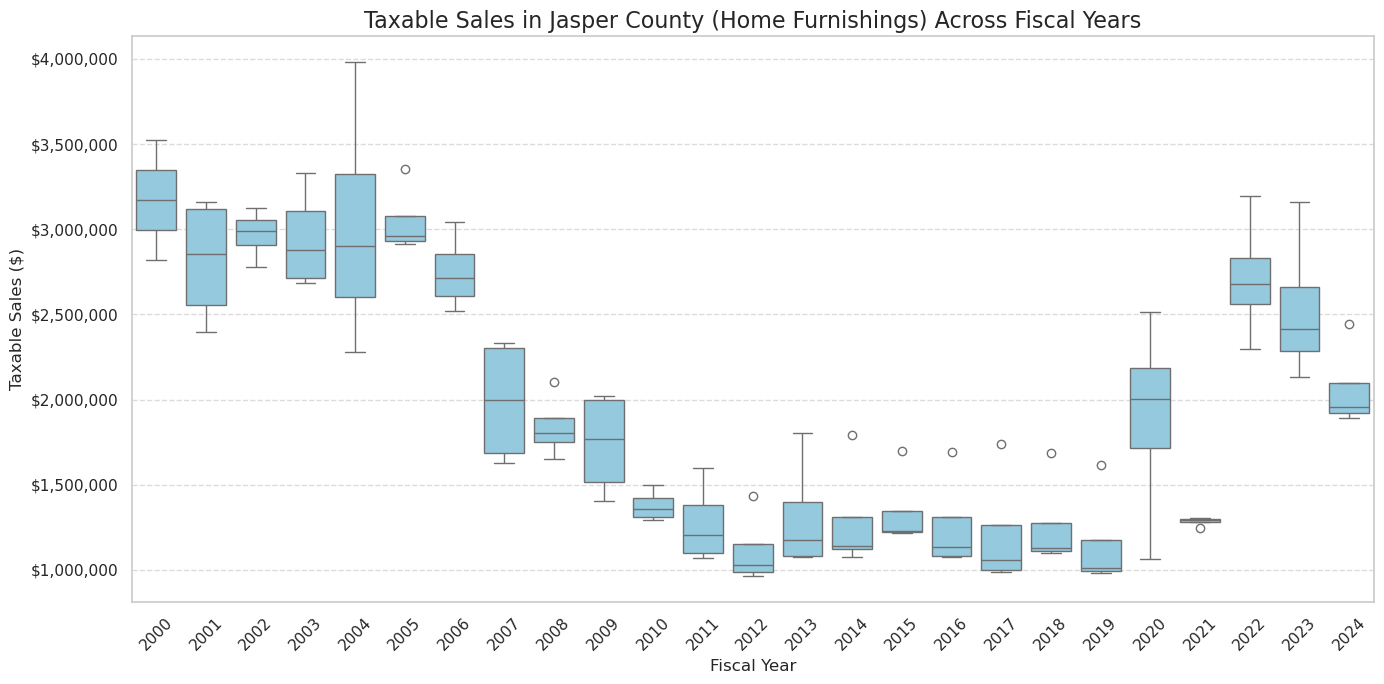

In [78]:
import matplotlib.ticker as mtick

# Filter the dataset for County_Number = 50 and Business Group = Home Furnishings
filtered_data = iowa_cleaned_data[
    (iowa_cleaned_data['County_Number'] == 50) &
    (iowa_cleaned_data['Business Group'] == 'Home Furnishings')
]

# Get the county name for County_Number = 50
county_name = iowa_cleaned_data.loc[iowa_cleaned_data['County_Number'] == 50, 'County'].iloc[0]

# Create a box-and-whisker plot for Taxable Sales across Fiscal Years
plt.figure(figsize=(14, 7))
sns.boxplot(data=filtered_data, x='Fiscal Year', y='Taxable Sales', color='skyblue')

# Customize the plot
plt.title(f'Taxable Sales in {county_name} County (Home Furnishings) Across Fiscal Years', fontsize=16)
plt.xlabel('Fiscal Year', fontsize=12)
plt.ylabel('Taxable Sales ($)', fontsize=12)
plt.xticks(rotation=45)

# Format the y-axis to display dollar amounts
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### A few things to note here:

* We can observe serious, high consistency in taxable sales between 2000 and 2006 -- with one outlier value for 2004 that makes me scratch my head as to what occurred during 2004 (we're not quite at the height of the housing bubble). Unsurprisingly, however, we do see a significant dip in taxable sales starting in 2007 for home furnishings, which marks the beginning of the housing crisis in America. The median value drops at a significant rate between 2005 and 2006, and while not evident of a housing bubble, it does inspire one to wonder about correlations between home furnishing sales and other factors with mortgage-backed securities at the time.

* We also see an incredible spike during 2020, when the FRED rate was at a historic low (mortage rates ended up dropping below 3%!!) during the onset of COVID--2 compounding factors that drove individuals to purchase homes AND to buy more home furnishings because they weren't going out! It would be interesting to relate this data to home sales data in Jasper County during this year (and during the 2007-2008 market crash).

* 2021 figures look too crunchy - the data here may be skewed or non-representational of that year - potential for further exploration of 2021

* 2000-2001 also was the Dot Com bubble, so this may also reflect in Home Furnishings as well similar to the housing crisis of 2007-2008.

/tmp/ipykernel_4687/3937773698.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


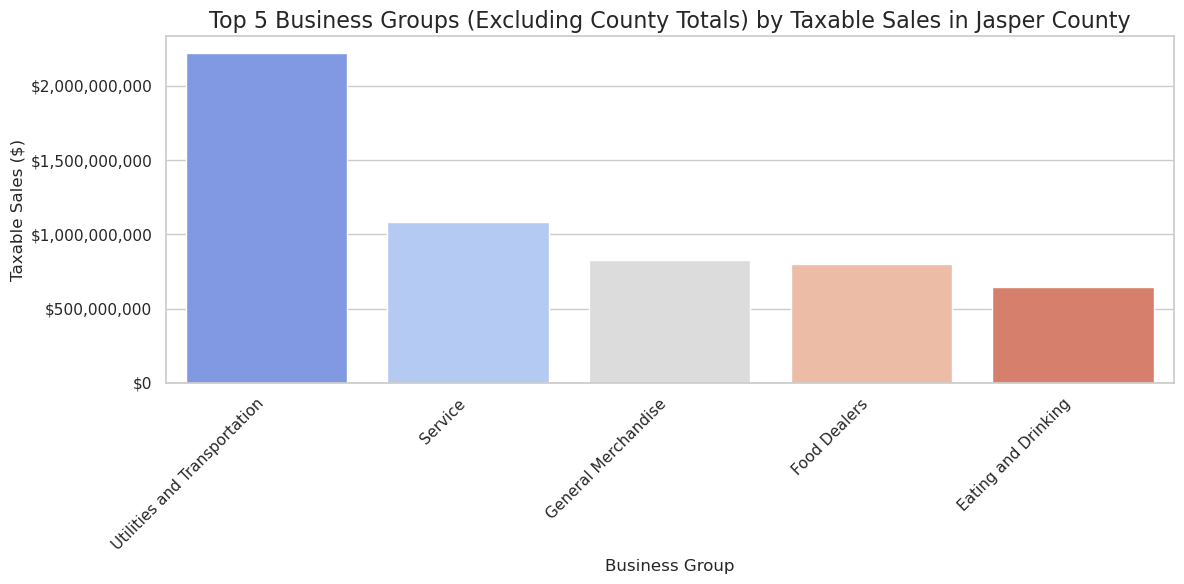

In [81]:
# Step 1: Filter data for Jasper County, excluding "County Totals"
jasper_county_data = iowa_cleaned_data[
    (iowa_cleaned_data['County'] == 'Jasper') &
    (iowa_cleaned_data['Business Group'] != 'County Totals')
]

# Step 2: Group by Business Group and aggregate Taxable Sales
business_group_sales = (
    jasper_county_data.groupby('Business Group', as_index=False)['Taxable Sales']
    .sum()
    .sort_values(by='Taxable Sales', ascending=False)
)

# Step 3: Select the next top 5 business groups by Taxable Sales
top_5_business_groups = business_group_sales.head(5)

# Step 4: Plot the data as a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_5_business_groups,
    x='Business Group',
    y='Taxable Sales',
    palette='coolwarm'
)

# Customize the plot
plt.title('Top 5 Business Groups (Excluding County Totals) by Taxable Sales in Jasper County', fontsize=16)
plt.xlabel('Business Group', fontsize=12)
plt.ylabel('Taxable Sales ($)', fontsize=12)
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('${x:,.0f}'))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Conclusion

In our analysis of the Iowa Retail Sales Tax dataset, we revealed several insights on taxable sales within Jasper County's home furnishings sector. From 2000 to 2006, taxable sales exhibited remarkable consistency, indicating a stable market environment. As anticipated, a significant dip in taxable sales emerged starting in 2007, aligning with the onset of the housing crisis in America. This decline was particularly pronounced between 2005 and 2006, where the median taxable sales dropped sharply. While this downturn doesn't directly signify a housing bubble, it does suggest potential correlations between home furnishing sales and broader economic factors, such as the fluctuations in mortgage-backed securities during that period.

The year 2020 presented a stark contrast, marked by an incredible spike in taxable sales. This surge coincided with historically low mortgage rates—around 3% or less—and the onset of the COVID-19 pandemic. These compounding factors likely drove individuals to purchase homes and invest more in home furnishings as they adapted to lockdowns and remote living conditions. It would be intriguing to correlate this data with home sales figures in Jasper County during 2020 and compare it to the trends observed during the 2007-2008 market crash to gain deeper insights into consumer behavior during economic upheavals.

Focusing on Jasper County, my analysis identified the top five business groups contributing to taxable sales across all fiscal years:

1. **Utilities and Transportation** (over 2 million dollars)  
2. **Service** (slightly above 1 million dollars)  
3. **General Merchandise** (approximately 750K dollars)  
4. **Food Dealers** (nearly 750K dollars)  
5. **Eating and Drinking** (around 600K dollars)  

This distribution reflects a balanced mix of residential and commercial enterprises that support community growth and retention. These business groups are essential for sustaining residential areas, as they cater to everyday needs and foster economic stability within the county. It comes as no surprise that Jasper County sits on the periphery of Des Moines, which is the capital and most populous city of Iowa by far throughout the 21st century. 

- During our data quality and transformation review, I identified several outliers:
  - Maximum of 202,324 in "Number of Returns"
  - 13,184,210,000 dollars in "Taxable Sales"
  - 788,998,300 dollars in "Computed Tax"  

These extreme values significantly skewed our dataset, as evidenced by the high standard deviations across respective columns.

- Recognizing the importance of accurate data, I implemented the following updates:
  - Updated the "Quarter Ending" dates to reflect the actual end-of-quarter dates: 03-31, 06-30, 09-30, and 12-31, ensuring consistency for future time series analyses.
  - Addressed suppressed data represented by 'S' values by:
    - Converting them to NaN
    - Dropping approximately 12,437 out of 126,146 rows to maintain data integrity.

Our exploration of data anomalies revealed specific quarters, such as for June 2003 and March 2019, with irregularities like suppressed returns and inconsistent taxable sales figures. These anomalies suggest potential data entry errors or issues in the data ingestion process. Given the questionable accuracy of these entries, I decided to exclude these rows from further analysis to preserve the dataset's reliability without significantly impacting downstream analyses.


# Further Research Questions

* Consumer Sensitivity Analyses - what potential relationships can be explored between: tax on consumption vs. income vs. consumer demand? 
* What factors drive the success of certain business groups in given counties versus others, and why? How could zoning (residential, commercial, etc.) tie in?